In [1]:
import pandas as pd
import sys
import matplotlib
import numpy as np
import scipy as sp
import sklearn
import datetime
from datetime import timedelta
import matplotlib.pyplot as plt

# Feature Engineering

In [2]:
nba_free_live = pd.read_excel("C:\\Users\\ading\\Desktop\\Main Folder\\Avalon Ding\\Main folder\\Data Analysis & Reports\\Database\\Python wrapped\\New\\NBA_free_live_2019.xlsx",header=0, index_col=0)

In [3]:
#fill na values with 0
nba_free_live.fillna(0, inplace=True)

In [4]:
#calculate total video viewers and views by add up corresponding columns
nba_free_live['total_vu'] = nba_free_live.apply(lambda row: row['carereader_vu'] + 
                                                            row['h5_vu'] +
                                                            row['newsapp_vu'] + 
                                                            row['ott_vu'] +
                                                            row['pcclient_vu'] +
                                                            row['pcsite_vu'] +
                                                            row['qqbrowser_vu'] +
                                                            row['sportsapp_vu'] +
                                                            row['videoapp_vu'], axis=1)
nba_free_live['total_vv'] = nba_free_live.apply(lambda row: row['carereader_vv'] + 
                                                            row['h5_vv'] +
                                                            row['newsapp_vv'] + 
                                                            row['ott_vv'] +
                                                            row['pcclient_vv'] +
                                                            row['pcsite_vv'] +
                                                            row['qqbrowser_vv'] +
                                                            row['sportsapp_vv'] +
                                                            row['videoapp_vv'], axis=1)

In [5]:
#transform date column to datetime
nba_free_live['date'] = pd.to_datetime(nba_free_live['date'])

In [6]:
#add column for year of game
nba_free_live['year'] = nba_free_live['date'].dt.year

In [7]:
#add column for month of game
nba_free_live['month'] = nba_free_live['date'].dt.month

In [8]:
#add column for week day of game
nba_free_live['week_day'] = nba_free_live['date'].apply(lambda x : x.isoweekday())

In [9]:
#add column for week of year
nba_free_live['week'] = nba_free_live['date'].dt.week

In [10]:
#define key dates for the past seasons
season_start_1011 = datetime.datetime.strptime("10/26/2010", "%m/%d/%Y")
season_po_start_1011 = datetime.datetime.strptime("04/16/2011", "%m/%d/%Y")
season_final_start_1011 = datetime.datetime.strptime("05/31/2011", "%m/%d/%Y")
season_end_1011 = datetime.datetime.strptime("06/14/2011", "%m/%d/%Y")
season_start_1112 = datetime.datetime.strptime("12/25/2011", "%m/%d/%Y")
season_po_start_1112 = datetime.datetime.strptime("04/28/2012", "%m/%d/%Y")
season_final_start_1112 = datetime.datetime.strptime("06/12/2012", "%m/%d/%Y")
season_end_1112 = datetime.datetime.strptime("06/23/2012", "%m/%d/%Y")
season_start_1213 = datetime.datetime.strptime("10/30/2012", "%m/%d/%Y")
season_po_start_1213 = datetime.datetime.strptime("04/20/2013", "%m/%d/%Y")
season_final_start_1213 = datetime.datetime.strptime("06/06/2013", "%m/%d/%Y")
season_end_1213 = datetime.datetime.strptime("06/22/2013", "%m/%d/%Y")
season_start_1314 = datetime.datetime.strptime("10/29/2013", "%m/%d/%Y")
season_po_start_1314 = datetime.datetime.strptime("04/19/2014", "%m/%d/%Y")
season_final_start_1314 =datetime.datetime.strptime("06/05/2014", "%m/%d/%Y")
season_end_1314 = datetime.datetime.strptime("06/17/2014", "%m/%d/%Y")
season_start_1415 = datetime.datetime.strptime("10/28/2014", "%m/%d/%Y")
season_po_start_1415 = datetime.datetime.strptime("04/18/2015", "%m/%d/%Y")
season_final_start_1415 = datetime.datetime.strptime("06/04/2015", "%m/%d/%Y")
season_end_1415 = datetime.datetime.strptime("06/18/2015", "%m/%d/%Y")
season_start_1516 = datetime.datetime.strptime("10/27/2015", "%m/%d/%Y")
season_po_start_1516 = datetime.datetime.strptime("04/16/2016", "%m/%d/%Y")
season_final_start_1516 = datetime.datetime.strptime("06/02/2016", "%m/%d/%Y")
season_end_1516 = datetime.datetime.strptime("06/21/2016", "%m/%d/%Y")
season_start_1617 = datetime.datetime.strptime("10/25/2016", "%m/%d/%Y")
season_po_start_1617 = datetime.datetime.strptime("04/15/2017", "%m/%d/%Y")
season_final_start_1617 = datetime.datetime.strptime("06/01/2017", "%m/%d/%Y")
season_end_1617 = datetime.datetime.strptime("06/14/2017", "%m/%d/%Y")
season_start_1718 = datetime.datetime.strptime("10/17/2017", "%m/%d/%Y")
season_po_start_1718 = datetime.datetime.strptime("04/14/2018", "%m/%d/%Y")
season_final_start_1718 = datetime.datetime.strptime("05/31/2018", "%m/%d/%Y")
season_end_1718 = datetime.datetime.strptime("06/10/2018", "%m/%d/%Y")
season_start_1819 = datetime.datetime.strptime("10/16/2018", "%m/%d/%Y")
season_po_start_1819 = datetime.datetime.strptime("04/13/2019", "%m/%d/%Y")
season_final_start_1819 = datetime.datetime.strptime("05/30/2019", "%m/%d/%Y")
season_end_1819 = datetime.datetime.strptime("06/15/2019", "%m/%d/%Y")

season_asw_start_1415 = datetime.datetime.strptime("02/13/2015", "%m/%d/%Y")
season_asw_end_1415 = datetime.datetime.strptime("02/17/2015", "%m/%d/%Y")
season_asw_start_1516 = datetime.datetime.strptime("02/12/2016", "%m/%d/%Y")
season_asw_end_1516 = datetime.datetime.strptime("02/16/2016", "%m/%d/%Y")
season_asw_start_1617 = datetime.datetime.strptime("02/17/2017", "%m/%d/%Y")
season_asw_end_1617 = datetime.datetime.strptime("02/21/2017", "%m/%d/%Y")
season_asw_start_1718 = datetime.datetime.strptime("02/16/2018", "%m/%d/%Y")
season_asw_end_1718 = datetime.datetime.strptime("02/20/2018", "%m/%d/%Y")
season_asw_start_1819 = datetime.datetime.strptime("02/15/2019", "%m/%d/%Y")
season_asw_end_1819 = datetime.datetime.strptime("02/19/2019", "%m/%d/%Y")

In [11]:
#add column for season base on the dates definition
def season(dt):
    if (dt > season_start_1011) & (dt < season_end_1011) :
        return '10-11'
    elif (dt > season_start_1112) & (dt < season_end_1112) :
        return '11-12'
    elif (dt > season_start_1213) & (dt < season_end_1213) :
        return '12-13'
    elif (dt > season_start_1314) & (dt < season_end_1314) :
        return '13-14'
    elif (dt > season_start_1415) & (dt < season_end_1415) :
        return '14-15'
    elif (dt > season_start_1516) & (dt < season_end_1516) :
        return '15-16'
    elif (dt > season_start_1617) & (dt < season_end_1617) :
        return '16-17'
    elif (dt > season_start_1718) & (dt < season_end_1718) :
        return '17-18'
    elif (dt > season_start_1819) & (dt < season_end_1819) :
        return '18-19'
    else:
        return 'off_season'
    
nba_free_live['season'] = np.array([season(x) for x in nba_free_live['date']])

In [12]:
#add column for seasonality base on the dates definition
def seasonality(dt):
    if ((dt > season_start_1011) & (dt < (season_po_start_1011+timedelta(1)))) | ((dt > season_start_1112) & (dt < (season_po_start_1112+timedelta(1)))) | ((dt > season_start_1213) & (dt < (season_po_start_1213+timedelta(1)))) | ((dt > season_start_1314) & (dt < (season_po_start_1314+timedelta(1)))) | ((dt > season_start_1415) & (dt < (season_po_start_1415+timedelta(1)))) | ((dt > season_start_1516) & (dt < (season_po_start_1516+timedelta(1)))) | ((dt > season_start_1617) & (dt < (season_po_start_1617+timedelta(1)))) | ((dt > season_start_1718) & (dt < (season_po_start_1718+timedelta(1)))) | ((dt > season_start_1819) & (dt < (season_po_start_1819+timedelta(1)))) :
        return 'regular_season'
    elif ((dt > season_po_start_1011) & (dt < (season_final_start_1011+timedelta(1)))) | ((dt > season_po_start_1112) & (dt < (season_final_start_1112+timedelta(1)))) | ((dt > season_po_start_1213) & (dt < (season_final_start_1213+timedelta(1)))) | ((dt > season_po_start_1314) & (dt < (season_final_start_1314+timedelta(1)))) | ((dt > season_po_start_1415) & (dt < (season_final_start_1415+timedelta(1)))) | ((dt > season_po_start_1516) & (dt < (season_final_start_1516+timedelta(1)))) | ((dt > season_po_start_1617) & (dt < (season_final_start_1617+timedelta(1)))) | ((dt > season_po_start_1718) & (dt < (season_final_start_1718+timedelta(1)))) | ((dt > season_po_start_1819) & (dt < (season_final_start_1819+timedelta(1)))) :
        return 'playoffs'
    elif ((dt > season_final_start_1011) & (dt < (season_end_1011))) | ((dt > season_final_start_1112) & (dt < (season_end_1112))) | ((dt > season_final_start_1213) & (dt < (season_end_1213))) | ((dt > season_final_start_1314) & (dt < (season_end_1314))) | ((dt > season_final_start_1415) & (dt < (season_end_1415))) | ((dt > season_final_start_1516) & (dt < (season_end_1516))) | ((dt > season_final_start_1617) & (dt < (season_end_1617))) | ((dt > season_final_start_1718) & (dt < (season_end_1718))) | ((dt > season_final_start_1819) & (dt < (season_end_1819))) :
        return 'finals'
    else:
        return 'off_season'
    
nba_free_live['seasonality'] = np.array([seasonality(x) for x in nba_free_live['date']])

In [13]:
#replace asw game with all_star_weekend in seasonality column
nba_free_live.loc[nba_free_live.loc[(((nba_free_live['date'] > season_asw_start_1415) & 
                                     (nba_free_live['date'] < season_asw_end_1415)) | 
                                     ((nba_free_live['date'] > season_asw_start_1516) & 
                                     (nba_free_live['date'] < season_asw_end_1516)) |
                                     ((nba_free_live['date'] > season_asw_start_1617) & 
                                     (nba_free_live['date'] < season_asw_end_1617)) |
                                     ((nba_free_live['date'] > season_asw_start_1718) & 
                                     (nba_free_live['date'] < season_asw_end_1718)) |
                                     ((nba_free_live['date'] > season_asw_start_1819) & 
                                     (nba_free_live['date'] < season_asw_end_1819))),:].index, 'seasonality'] = 'all_star_weekend'

# Pivot

In [14]:
#generate pivot table to display the summary of average per game viewership across season breakdown by seasonality
nba_free_live_pivot = pd.pivot_table(nba_free_live,index='seasonality',columns='season',
                                     values='total_vu',aggfunc='mean',margins=True)
nba_free_live_pivot.drop('off_season', axis = 0, inplace = True)
nba_free_live_pivot.drop('off_season', axis = 1, inplace = True)
nba_free_live_pivot.drop('All', axis = 1, inplace = True)
nba_free_live_pivot.fillna(0, inplace=True)
#nba_free_live_pivot.plot()

#add columns for yoy change across season breakdown by seasonality
list_1 = [1,2,3,4,5,6,7,8,9,10,11]
for x in list_1:
    nba_free_live_pivot[nba_free_live_pivot.columns[x]+'_yoy'] = nba_free_live_pivot[nba_free_live_pivot.columns[x]]/nba_free_live_pivot[nba_free_live_pivot.columns[x-1]]-1
    
nba_free_live_pivot.drop(['11-12_yoy_yoy','12-13_yoy_yoy','13-14_yoy_yoy'], axis = 1, inplace = True)

#save to excel file
#nba_free_live_pivot.to_excel('nba_free_live_pivot.xlsx')

In [32]:
#top matchups by total viewership
nba_free_live.loc[nba_free_live.loc[nba_free_live['seasonality'] == 'finals',:].index,['season','date','home_team_eng','away_team_eng','total_vu']].sort_values(by = 'total_vu', ascending = False)[:5]

,season,date,home_team_eng,away_team_eng,total_vu
2896,18-19,2019-06-14 08:00:00,GSW,TOR,20936259.0
2895,18-19,2019-06-11 08:00:00,TOR,GSW,18478234.0
2481,17-18,2018-06-01 08:00:00,GSW,CLE,16465880.0
2075,16-17,2017-06-13 00:00:00,GSW,CLE,16035290.0
1655,15-16,2016-06-20 00:00:00,CLE,GSW,15334734.0


In [15]:
nba_free_live_weekly = pd.pivot_table(nba_free_live, index = 'week', columns = 'season',
                                values = 'total_vu', aggfunc = 'mean', margins = True)
nba_free_live_weekly

season,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,18-19,off_season,All
week,,,,,,,,,,,
1,3.685703e+05,9.256094e+05,7.528244e+05,5.896199e+05,9.997199e+05,1.438170e+06,1.722130e+06,2.324516e+06,3.522291e+06,NaN,1.619481e+06
2,4.163098e+05,8.490943e+05,7.431445e+05,9.538484e+05,1.084284e+06,1.323448e+06,1.569040e+06,1.877321e+06,2.754230e+06,NaN,1.407428e+06
3,3.312118e+05,8.159508e+05,1.043241e+06,1.063481e+06,1.072089e+06,1.595842e+06,1.575582e+06,1.956834e+06,2.968454e+06,NaN,1.465347e+06
4,2.643305e+05,3.903483e+05,5.904418e+05,6.177825e+05,7.167084e+05,1.486416e+06,1.288417e+06,1.819353e+06,2.752385e+06,NaN,1.154985e+06
5,1.302431e+05,6.678698e+05,7.222586e+05,4.834528e+05,7.113179e+05,1.088671e+06,1.460319e+06,1.890838e+06,3.105363e+06,NaN,1.320082e+06
6,2.630316e+05,9.916664e+05,5.296976e+05,5.793235e+05,6.987388e+05,1.573585e+06,1.490638e+06,2.358962e+06,2.621613e+06,NaN,1.351473e+06
7,2.135388e+05,9.777254e+05,3.704986e+05,7.704989e+05,8.441937e+05,2.591650e+06,1.861538e+06,2.801059e+06,3.516735e+06,NaN,1.703738e+06
8,3.865791e+05,1.342035e+06,8.328454e+05,1.125469e+06,7.520150e+05,1.524247e+06,2.515582e+06,3.122561e+06,4.317790e+06,NaN,1.778226e+06
9,5.273826e+05,9.369226e+05,8.208030e+05,8.303140e+05,5.643334e+05,1.520187e+06,1.703677e+06,2.772891e+06,2.915888e+06,NaN,1.557529e+06


In [16]:
nba_free_live.columns

Index(['carereader_mins', 'carereader_vu', 'carereader_vv', 'date', 'h5_mins',
       'h5_vu', 'h5_vv', 'newsapp_mins', 'newsapp_vu', 'newsapp_vv', 'ott_vu',
       'ott_vv', 'pcclient_mins', 'pcclient_vu', 'pcclient_vv', 'pcsite_mins',
       'pcsite_vu', 'pcsite_vv', 'qqbrowser_mins', 'qqbrowser_vu',
       'qqbrowser_vv', 'sportsapp_mins', 'sportsapp_vu', 'sportsapp_vv',
       'start_time', 'videoapp_mins', 'videoapp_vu', 'videoapp_vv',
       'home_team_eng', 'away_team_eng', 'partner', 'total_vu', 'total_vv',
       'year', 'month', 'week_day', 'week', 'season', 'seasonality'],
      dtype='object')

In [47]:
nba_free_live['start_of_week'] = nba_free_live['date'].apply(lambda x : x.date() - timedelta(days = x.weekday()))

In [48]:
nba_free_live.tail(10)

,carereader_mins,carereader_vu,carereader_vv,date,h5_mins,h5_vu,h5_vv,newsapp_mins,newsapp_vu,newsapp_vv,...,partner,total_vu,total_vv,year,month,week_day,week,season,seasonality,start_of_week
2887,24.13,11601.0,29775.0,2019-05-21 08:00:00,0.0,7542.0,23158.0,20.06,1777321.0,5012719.0,...,tencent,10272788.0,32005527.0,2019,5,2,21,18-19,playoffs,2019-05-20
2888,19.15,9905.0,21410.0,2019-05-22 07:30:00,0.0,3780.0,15297.0,16.32,1488503.0,3488560.0,...,tencent,7894678.0,20894311.0,2019,5,3,21,18-19,playoffs,2019-05-20
2889,23.67,9854.0,23879.0,2019-05-24 07:30:00,0.0,5224.0,19965.0,18.63,1557782.0,3893725.0,...,tencent,8694779.0,23603598.0,2019,5,5,21,18-19,playoffs,2019-05-20
2890,25.29,8693.0,17378.0,2019-05-26 07:30:00,0.0,12106.0,57158.0,23.09,2027802.0,5317236.0,...,tencent,10796788.0,30870426.0,2019,5,7,21,18-19,playoffs,2019-05-20
2891,29.31,14170.0,41080.0,2019-05-31 08:00:00,0.0,19816.0,75822.0,26.08,2163618.0,7337129.0,...,tencent,14214943.0,51042673.0,2019,5,5,22,18-19,finals,2019-05-27
2892,22.05,20030.0,48396.0,2019-06-03 07:00:00,0.0,10684.0,45078.0,24.12,2236672.0,7049023.0,...,tencent,13214108.0,43369323.0,2019,6,1,23,18-19,finals,2019-06-03
2893,26.05,25216.0,68890.0,2019-06-06 08:00:00,0.0,11382.0,37362.0,25.89,2166060.0,7336644.0,...,tencent,14425232.0,51629068.0,2019,6,4,23,18-19,finals,2019-06-03
2894,19.29,41533.0,92064.0,2019-06-08 08:00:00,0.0,14297.0,40759.0,29.14,2359690.0,7652096.0,...,tencent,15107783.0,52082138.0,2019,6,6,23,18-19,finals,2019-06-03
2895,16.85,21686.0,63590.0,2019-06-11 08:00:00,0.0,21659.0,71220.0,18.61,2702694.0,10106597.0,...,tencent,18478234.0,71412783.0,2019,6,2,24,18-19,finals,2019-06-10
2896,34.33,26379.0,86458.0,2019-06-14 08:00:00,0.0,27402.0,75515.0,29.75,3232755.0,12049660.0,...,tencent,20936259.0,83970459.0,2019,6,5,24,18-19,finals,2019-06-10


In [94]:
nba_free_live_1011 = nba_free_live.loc[nba_free_live.loc[nba_free_live['season'] == '10-11',:].index, :]
nba_free_live_1112 = nba_free_live.loc[nba_free_live.loc[nba_free_live['season'] == '11-12',:].index, :]
nba_free_live_1213 = nba_free_live.loc[nba_free_live.loc[nba_free_live['season'] == '12-13',:].index, :]
nba_free_live_1314 = nba_free_live.loc[nba_free_live.loc[nba_free_live['season'] == '13-14',:].index, :]
nba_free_live_1415 = nba_free_live.loc[nba_free_live.loc[nba_free_live['season'] == '14-15',:].index, :]
nba_free_live_1516 = nba_free_live.loc[nba_free_live.loc[nba_free_live['season'] == '15-16',:].index, :]
nba_free_live_1617 = nba_free_live.loc[nba_free_live.loc[nba_free_live['season'] == '16-17',:].index, :]
nba_free_live_1718 = nba_free_live.loc[nba_free_live.loc[nba_free_live['season'] == '17-18',:].index, :]
nba_free_live_1819 = nba_free_live.loc[nba_free_live.loc[nba_free_live['season'] == '18-19',:].index, :]

In [68]:
nba_free_live_weekly = nba_free_live.groupby(['season','start_of_week'])[['total_vu']].mean()
nba_free_live_weekly.to_excel('nba_free_live_weekly.xlsx')

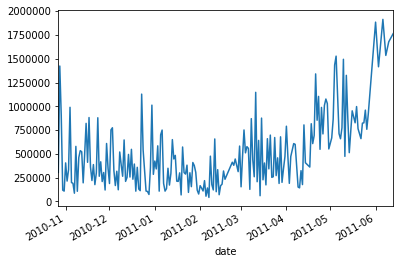

In [99]:
pv = pd.pivot_table(nba_free_live_pivot, index=nba_free_live_pivot.year, columns=df.index.year,
                    values='total_vu', aggfunc='mean')

In [23]:
nba_free_live_summary = nba_free_live['total_vu'].groupby([nba_free_live['season'], 
                                                           nba_free_live['seasonality']]).mean().unstack()

In [24]:
nba_free_live_summary

seasonality,mean_all_star_weekend,mean_finals,mean_off_season,mean_playoffs,mean_regular_season
season,,,,,
mean_10-11,NaN,1.698553e+06,NaN,9.081329e+05,3.917866e+05
mean_11-12,NaN,3.128667e+06,NaN,1.923736e+06,8.884938e+05
mean_12-13,NaN,3.382421e+06,NaN,1.363626e+06,8.649920e+05
mean_13-14,NaN,2.905463e+06,NaN,1.631475e+06,8.373230e+05
mean_14-15,1030303.00,4.033392e+06,NaN,1.993625e+06,9.051608e+05
mean_15-16,3468984.00,9.432480e+06,NaN,3.042167e+06,1.650215e+06
mean_16-17,4241999.75,1.239516e+07,NaN,3.841823e+06,1.649304e+06
mean_17-18,4400028.00,1.496390e+07,NaN,6.918800e+06,2.316922e+06
mean_18-19,6140183.20,1.508806e+07,NaN,6.996966e+06,2.838803e+06
